# Principal Component Analysis

In this notebook I will demonstrate my understanding of Principal Component Analysis (PCA) as a tool to reduce the number of dimensions in a dataset typically used for machine learning. I show my understanding of PCA by applying PCA usage as demonstrated in the chapter on PCA in the Python Data Science Handbook, on the Iris dataset. My purpose is to reduce the 4 dimensional Iris dataset to a two dimensional dataset using scikit-learn's PCA implementation.

## 1. load iris data

In [149]:
# our standard imports
%matplotlib inline
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
matplotlib.rcParams["figure.figsize"] = [18, 12]

# load iris data
from sklearn import datasets
iris = datasets.load_iris()
data = iris["data"]

## 2. import, configure and fit PCA

Previously when working with the Iris dataset, we simply cut all but the first two features from the dataset. This made it easier for us to visualise and work with the data provided. This however came at the cost of reducing the total information we were working with and most likely changed the results yielded by our estimators.

In order to more easily visualise data while losing less information (or, ideally, none at all), we use Principal Component Analysis: Basically, this looks for what is called the "principal axes": The features that (most) completely describe the data on their own. They can be found by calculating the correlation between two features and essentially descarding/ ignoring those that contain information that can be closely estimated by looking at another feature.

In [148]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 2) # reducing from 4 to 2 components
projected_data = pca.fit_transform(data)

# compare data sizes: 4 columns compared to 2
print(data.shape)
print(projected_data.shape)

(150, 4)
(150, 2)


## 3. visualize results
Below I have visualized the three iris types using three different colors in a scatter plot, with the two pricipal components on x and y axis.

The data is now reduced from having four columns to only two. This way it can be visualised more easily understandable.

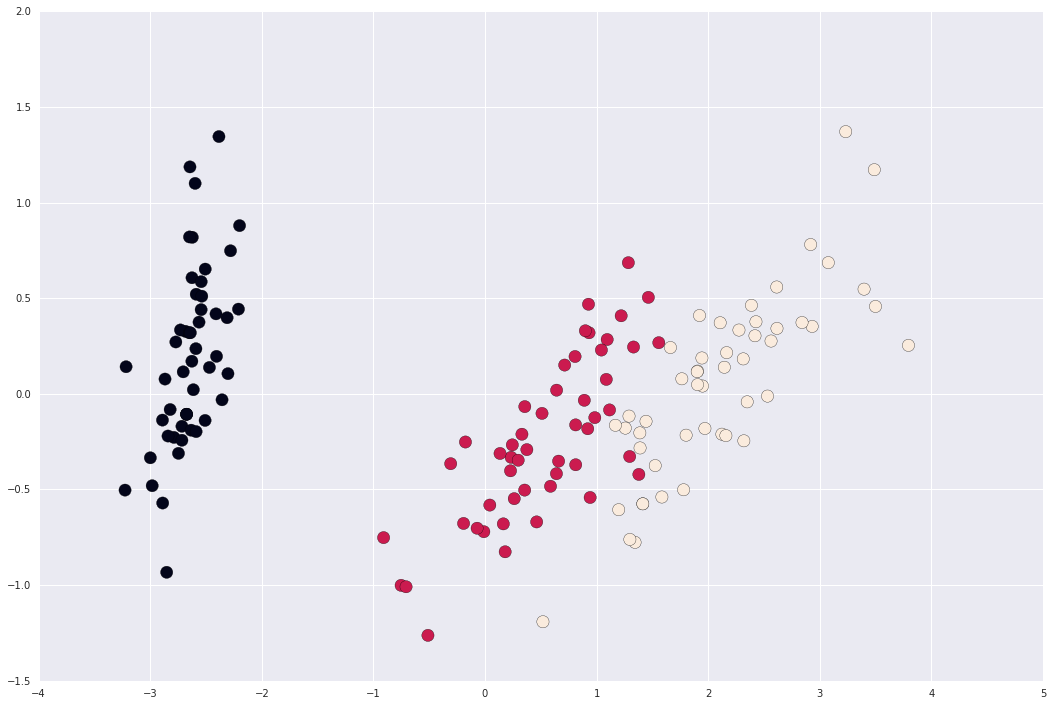

In [146]:
# your code goes here
s = [150 for x in data] # dot size
plt.scatter(projected_data[:, 0], projected_data[:, 1], c=iris["target"], s=s)

## 4. classify the reduced data set to the 3 iris type

Finally, I want to find out how well the projected data set works compared to the full original data: I expect it to perform similarly though occasionally a litte worse.
Because some data is missing, the support vector machine i want to use for classification is bound to make some mistakes.

The results show that in most cases (the test and training data is split randomly each time which accounts for the change in results), the projected data performs similarly to the original data. Sometimes both reach 100 per cent reliability, sometimes they are a few percentage points apart.

This shows that by using Principal Component Analysis, a data scientist can make visualisation easier and more convenient without losing too much information. However this is based on my experience with only the Iris data set which has been created for this specific purpose. I suspect that real-world data may often perform considerably worse as its columns may not correlate as well as this example data set.

In [147]:
from sklearn.cross_validation import train_test_split

train_size = 0.5

# original data with 4 columns
X_learn_A, X_test_A, Y_learn_A, Y_test_A = train_test_split(data, iris["target"], train_size=train_size)

# projected data with 2 columns
X_learn_B, X_test_B, Y_learn_B, Y_test_B = train_test_split(projected_data, iris["target"], train_size=train_size)

def get_matching_percentage(list_1, list_2):
    if not len(list_1) == len(list_2):
        print("list lengths not matching")
        return -1
    count = 0;
    correct_count = 0;
    for i in range(len(list_1)):
        count +=1
        if(list_1[i] == list_2[i]):
            correct_count +=1
    return 100 * (correct_count / count)

from sklearn.svm import SVC

# teach and predict with original data
model_A = SVC(kernel="linear")
model_A.fit(X_learn_A, Y_learn_A)
prediction_A = model_A.predict(X_test_A)

# teach and predict with projected data
model_B = SVC(kernel="linear")
model_B.fit(X_learn_B, Y_learn_B)
prediction_B = model_B.predict(X_test_B)


# show results
print("original results:")
print("expected:")
print(str(Y_test_A))
print("actual:")
print(str(prediction_A))
print("percentage matching: " + str(get_matching_percentage(Y_test_A, prediction_A)))

print("\n\nprojected results:")
print("expected:")
print(str(Y_test_B))
print("actual:")
print(str(prediction_B))
print("percentage matching: " + str(get_matching_percentage(Y_test_B, prediction_B)))

original results:
expected:
[1 0 2 0 2 2 0 2 0 0 1 2 1 0 0 2 1 2 1 2 1 2 2 1 1 1 0 2 2 1 0 2 1 1 2 1 1
 1 0 1 0 0 2 1 1 1 1 1 0 2 0 0 2 1 2 0 1 0 0 2 0 2 1 2 1 2 2 1 2 2 2 0 0 0
 0]
actual:
[1 0 2 0 2 2 0 2 0 0 1 2 1 0 0 1 1 2 1 2 1 1 1 1 1 1 0 2 2 1 0 1 1 1 2 1 1
 1 0 1 0 0 2 1 1 1 1 1 0 2 0 0 2 1 2 0 1 0 0 2 0 2 1 2 1 2 2 1 2 2 1 0 0 0
 0]
percentage matching: 93.33333333333333


projected results:
expected:
[0 2 2 0 1 0 0 2 1 2 1 1 2 0 0 0 0 1 1 0 2 2 0 2 0 1 1 2 2 0 1 1 2 2 2 0 1
 1 1 2 1 2 0 0 0 1 0 1 2 1 2 2 0 1 0 2 2 2 1 1 1 2 0 0 2 2 2 1 1 1 0 1 0 0
 2]
actual:
[0 2 2 0 1 0 0 2 1 2 1 1 2 0 0 0 0 1 1 0 2 2 0 2 0 1 1 2 2 0 1 1 2 2 2 0 1
 1 1 2 2 2 0 0 0 1 0 1 2 1 1 2 0 1 0 2 2 2 1 1 1 2 0 0 2 2 2 1 1 1 0 1 0 0
 2]
percentage matching: 97.33333333333334
